In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import Preprocessing

In [2]:
img = cv2.imread('Coconuts\coconut.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
width = 320
height = 240
dim = (width, height)
new_img = cv2.resize(img, dim)

In [4]:
#cv2.imshow('graycsale image',img)
#plt.imshow(new_img, cmap = 'gray')

In [5]:
img1 = Preprocessing.preprocessing(img)

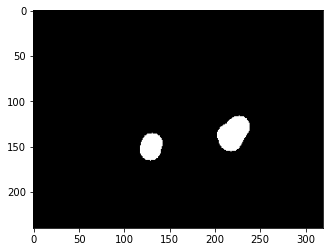

In [6]:
plt.imshow(img1, cmap = 'gray')

In [7]:
cv2.imshow('picture prepocessed',img1)
cv2.waitKey()

-1